# Intercalibration
This code uses PyROA to calculate the intercalibrated lightcurves for MR 2251
Information about the Running Optimal Averge (ROA): https://ui.adsabs.harvard.edu/abs/2021ascl.soft07002D/abstract

In [3]:
from inter_calibration import InterCalibrator

ImportError: cannot import name 'InterCalibrate' from 'PyROA' (unknown location)

In [6]:
csv = 'AVA_MR_2251-178_lco.csv'
filters = ['u', 'B', 'g', 'V', 'r', 'i', 'z']
objName = 'MR_2251'

cal = InterCalibrator(csv, objName)
priors = [[0.01, 10.0], [0.0, 2.0]]
Nsamples=15000
Nburnin=10000
for f in filters:
    cal.calibrate(f, priors=priors, Nsamples=Nsamples, Nburnin=Nburnin)

AttributeError: module 'PyROA' has no attribute 'InterCalibrate'

Let's plot the results

In [4]:
for f in filters:
    cal.plot_results(f)

NameError: name 'filters' is not defined

# Delay calculation

In [1]:
from delay_calculation import DelayCalculator

In [4]:
datadir = 'tmp/'
objName = 'MR_2251'
filters = ['u', 'B', 'g', 'V', 'r', 'i', 'z']

In [6]:
datadir = "PyROA/CREAMSynthetic/"
objName = 'lc'
filters=["1","2", "3"]

In [7]:
calculator = DelayCalculator(datadir, objName)

priors = [[0.0, 20.0],[0.0, 100.0], [-50.0, 50.0], [0.01, 10.0], [0.0, 10.0]]
Nsamples = 20000
Nburnin = 15000
add_var=True
delay_dist = True
psi_types = ["LogGaussian", "LogGaussian"]
delays = calculator.find_delays(filters, priors=priors, Nsamples=Nsamples,
                                Nburnin=Nburnin, add_var=True, delay_dist=True, psi_types=psi_types)

Initial Parameter Values
     A0       B0    σ0       A1       B1    τ1    Δ1    σ1       A2       B2    τ2    Δ2    σ2    Δ
-------  -------  ----  -------  -------  ----  ----  ----  -------  -------  ----  ----  ----  ---
37.8558  491.376  0.01  37.0235  453.912     1     1  0.01  34.5411  442.202     1     1  0.01    1
NWalkers=32


  0%|                                                   | 0/20000 [00:00<?, ?it/s]/home/ansep/.local/share/virtualenvs/MR_2251-_smVd6ly/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████████████████████████████████| 20000/20000 [02:52<00:00, 116.28it/s]


Filter: 1
Mean Delay, error: 0.00 (fixed)
Filter: 2
Mean Delay, error:    1.00002  (+   0.00011 -   0.00007)
Filter: 3
Mean Delay, error:    0.99995  (+   0.00004 -   0.00012)


Best Fit Parameters
     A0       B0         σ0       A1       B1       τ1       Δ1          σ1       A2       B2        τ2        Δ2          σ2         Δ
-------  -------  ---------  -------  -------  -------  -------  ----------  -------  -------  --------  --------  ----------  --------
37.8558  491.376  0.0100073  37.0235  453.912  1.00002  0.99997  0.00999532  34.5411  442.202  0.999948  0.999982  0.00998191  0.999987


/media/ansep/cool-hdd/repos/Nextcloud/pudu/U/MR 2251/PyROA.py:69: RuntimeWarning: invalid value encountered in double_scalars
  mu = np.log(mean**2/np.sqrt(mean**2 + sig**2))
/media/ansep/cool-hdd/repos/Nextcloud/pudu/U/MR 2251/PyROA.py:70: RuntimeWarning: invalid value encountered in double_scalars
  stddev2 = np.log( 1.0+ (sig**2)/(mean**2))


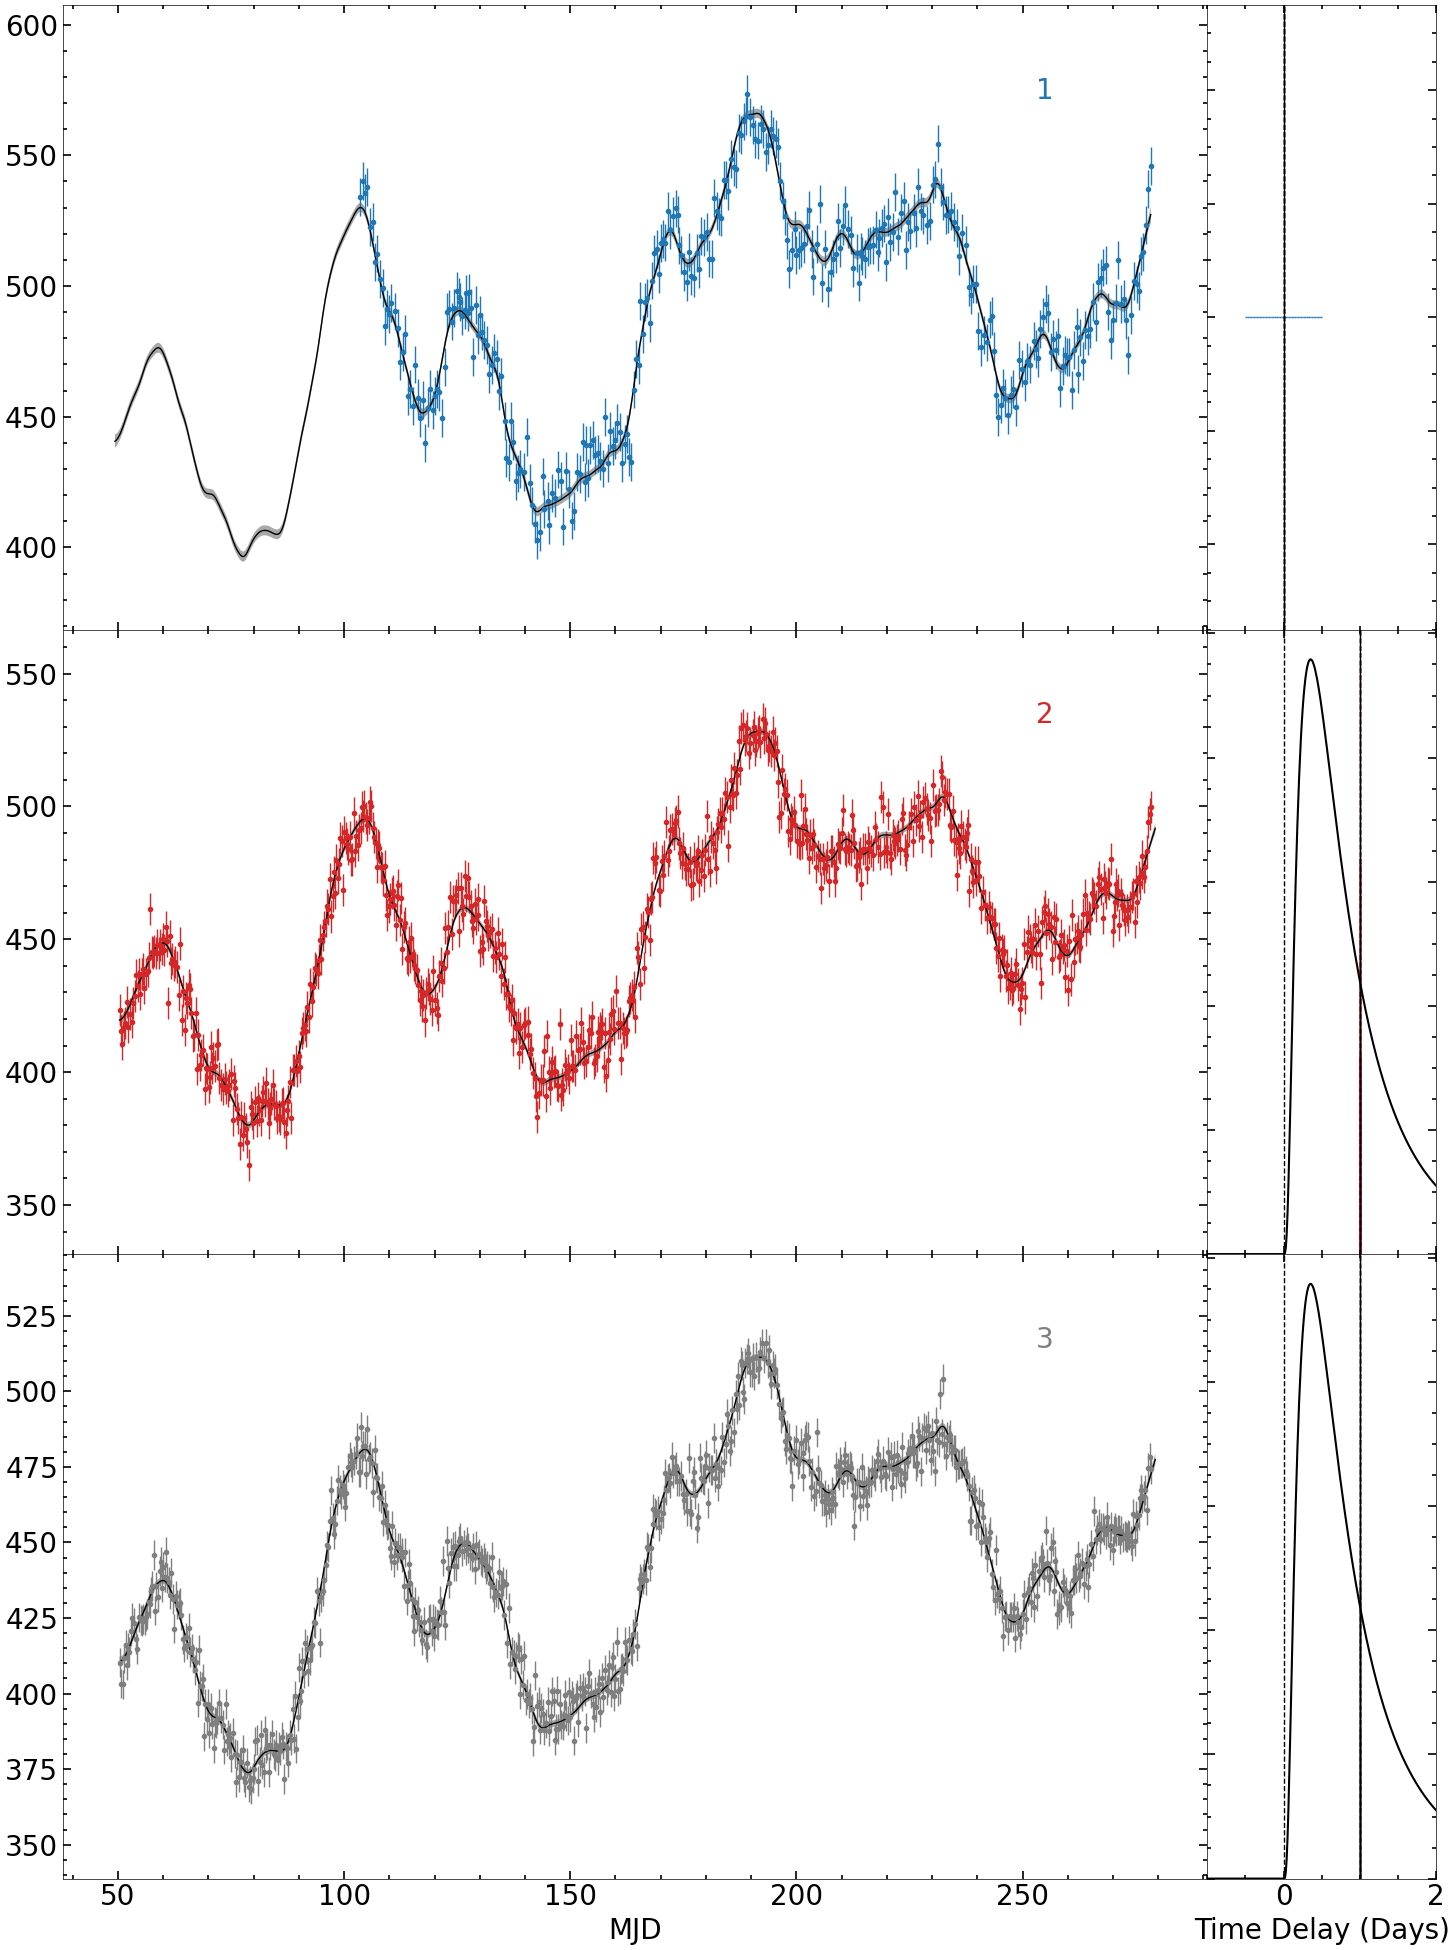

In [8]:
import PyROA
PyROA.Plot(delays)